In [1]:
import numpy as np
import scanpy as sc
from sklearn import decomposition, manifold
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [2]:
from dtne import *
import time

In [3]:
adata = sc.read_h5ad('rc.integrated.data.h5ad')
adata

AnnData object with n_obs × n_vars = 110427 × 17513
    obs: 'cell_type', 'cell_type2'
    uns: 'consensus_time', 'iroot'
    obsm: 'X_pca', 'umap'

In [4]:
sc.pp.neighbors(adata, 100,use_rep='X_pca')
sc.tl.diffmap(adata, 20)
sc.tl.dpt(adata, n_dcs=20,  copy=False)

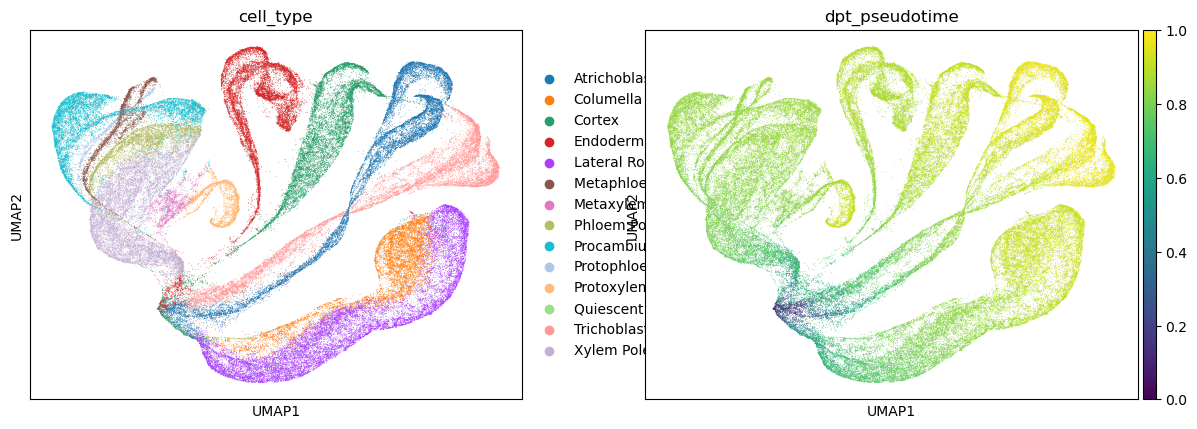

In [5]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type','dpt_pseudotime'])

In [6]:
adata.obs['dpt_pseudotime'].to_csv('rc.integrated.dpt_pseudotime.csv')

In [7]:
adata

AnnData object with n_obs × n_vars = 110427 × 17513
    obs: 'cell_type', 'cell_type2', 'dpt_pseudotime'
    uns: 'consensus_time', 'iroot', 'neighbors', 'diffmap_evals', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'umap', 'X_diffmap', 'X_umap'
    obsp: 'distances', 'connectivities'

In [8]:
sc.external.tl.palantir(adata,use_adjacency_matrix=False)

In [9]:
pal_res = sc.external.tl.palantir_results(adata,early_cell=adata.obs_names[3631])

Sampling and flocking waypoints...
Time for determining waypoints: 0.20521347522735595 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.4675774057706197 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9997
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [10]:
pal_res.pseudotime.to_csv('rc.integrated.palantir_pseudotime.csv')

In [11]:
pal_res.pseudotime.values

array([0.6272482682, 0.7931855061, 0.7692583191, ..., 0.3367585108,
       0.197147812 , 0.6309877272])

In [12]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline

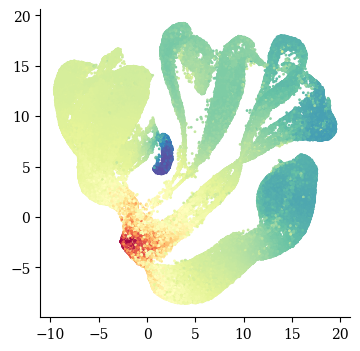

In [13]:
umap = adata.obsm['umap']
plt.scatter(umap[:,0], umap[:,1], c=pal_res.pseudotime.values,s=1,cmap='Spectral')
plt.show()

In [14]:
dpt_pseudotime = pd.read_csv('rc.integrated.dpt_pseudotime.csv',index_col=0)
dpt_pseudotime.values.reshape(-1)

array([0.8360902 , 0.9421239 , 0.910806  , ..., 0.5416336 , 0.33161578,
       0.84846795])

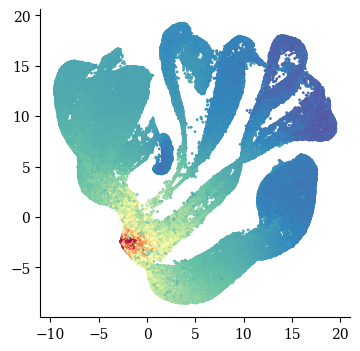

In [15]:
umap = adata.obsm['umap']
plt.scatter(umap[:,0], umap[:,1], c=dpt_pseudotime.values.reshape(-1),s=1,cmap='Spectral')
plt.show()